In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(10027, 28)
(10027, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps_continuous[:, 24] == 1)[0]
X_relative_footsteps_continuous_RR_swing = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RR_swing = Y_relative_footsteps_continuous[idxs]

## Predict RR foot -> x

In [8]:
X_relative_footsteps_continuous_RR_swing[0, :]

array([ 1.00000001e-01,  0.00000000e+00,  0.00000000e+00,  9.11893692e-02,
       -1.77642498e-01, -1.44425490e-03, -3.79832882e-04,  2.90665488e-02,
        2.75820694e-03,  2.19544484e-01,  2.08664947e-01, -4.04755931e-01,
        2.41754690e-01, -1.84191521e-01, -4.05253866e-01, -2.43501147e-01,
        1.54919233e-01, -4.00495847e-01, -2.74535236e-01, -1.27386125e-01,
       -4.00794023e-01,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000001e-01,  0.00000000e+00,  0.00000000e+00])

In [9]:
Y_relative_footsteps_continuous_RR_swing[0, :]

array([ 0.23613742,  0.18750784,  0.23240836, -0.20432631, -0.26976698,
        0.12960223, -0.24904521, -0.15161172])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_swing[:, 6]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9984606814476301
RMSE:  0.001127725880951042
The lowest error is:  1.5196071589951288e-07
The highest error is:  0.012046057777491181
The avg. error is:  0.0006981737810919225


In [11]:
model_rr_relative_swinging_x.coef_

array([[ 0.1250222 , -0.00469259, -0.00888703, -0.09481968, -0.05368231,
        -0.05742682,  0.04825628, -0.02973203,  0.02171032,  0.46250241,
         0.06154079]])

In [12]:
model_rr_relative_swinging_x.intercept_

array([-0.08349129])

Text(0, 0.5, 'Predictions')

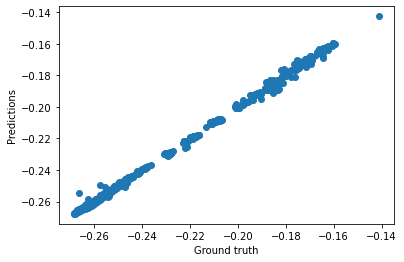

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rr_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [17]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_swing[:, 7]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9968254693726526
RMSE:  0.001122916645076063
The lowest error is:  5.399951737150577e-07
The highest error is:  0.010216284171772838
The avg. error is:  0.0007748893906515403


In [18]:
model_rr_relative_swinging_y.coef_

array([[-0.00394947,  0.11919255, -0.01565597, -0.02998044, -0.06601121,
        -0.01510047, -0.06574916,  0.05705113, -0.04226378,  0.03623258,
         0.46541475]])

In [19]:
model_rr_relative_swinging_y.intercept_

array([-0.0503018])

Text(0, 0.5, 'Predictions')

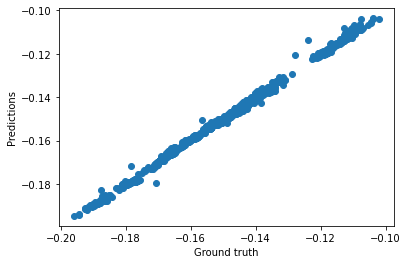

In [20]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_rr_relative_swinging_y

In [73]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [74]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")